# Problem Statement:
A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

We have to build a classification model to predict whether a transaction is fraudulent or not.


## The following is the steps are used to solve this problem statement: 

# 1) Exploratory Data Analysis

Analyzed and understood the data to identify patterns, relationships, and trends in the data by using Descriptive Statistics and Visualizations. 

In [1]:
# import the required libraries
import joblib
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score,  precision_recall_curve

In [2]:
# Load the credit card dataset
df = pd.read_csv(r"../data/creditcard.csv")   # Need to remove dataset path

In [3]:
# Top 5 data in the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Dataset columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# Dataset count and the data type information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Descriptive Statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Credit card transaction count is fraud or not
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
# Total amount for fraud or not fraud
amount_by_class = df.groupby('Class')['Amount'].sum()
print("Total Amount by Class:")
print(amount_by_class)

Total Amount by Class:
Class
0    25102462.04
1       60127.97
Name: Amount, dtype: float64


In [9]:
# Null value count in the dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Visualization

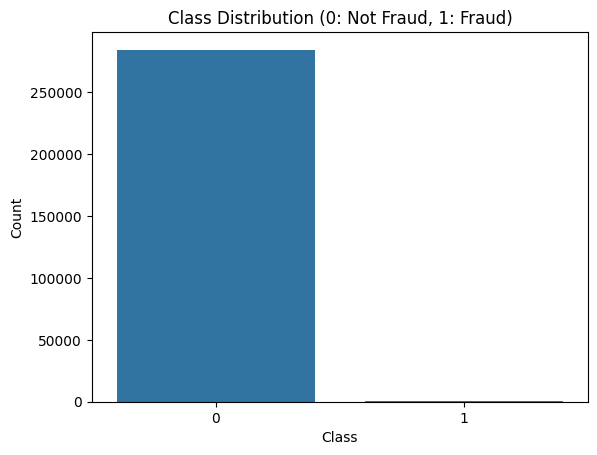

In [10]:
# Dataset class distribution bar plot
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0: Not Fraud, 1: Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.savefig("../visuals/Class Distribution.jpg")
plt.show()


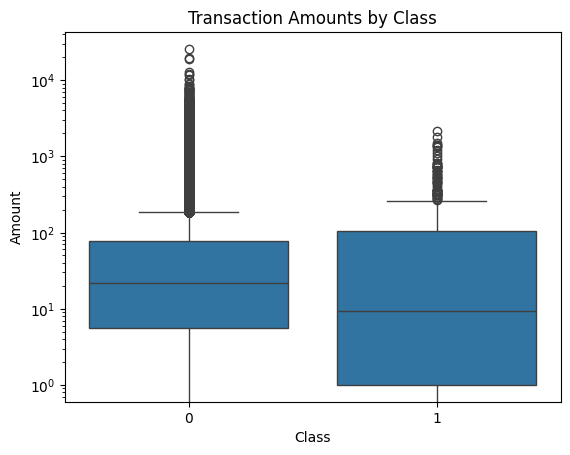

In [11]:
# Boxplot for transaction Amounts by Class
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amounts by Class")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.yscale('log')  
plt.savefig("../visuals/Transaction Amounts by Class.jpg")
plt.show()

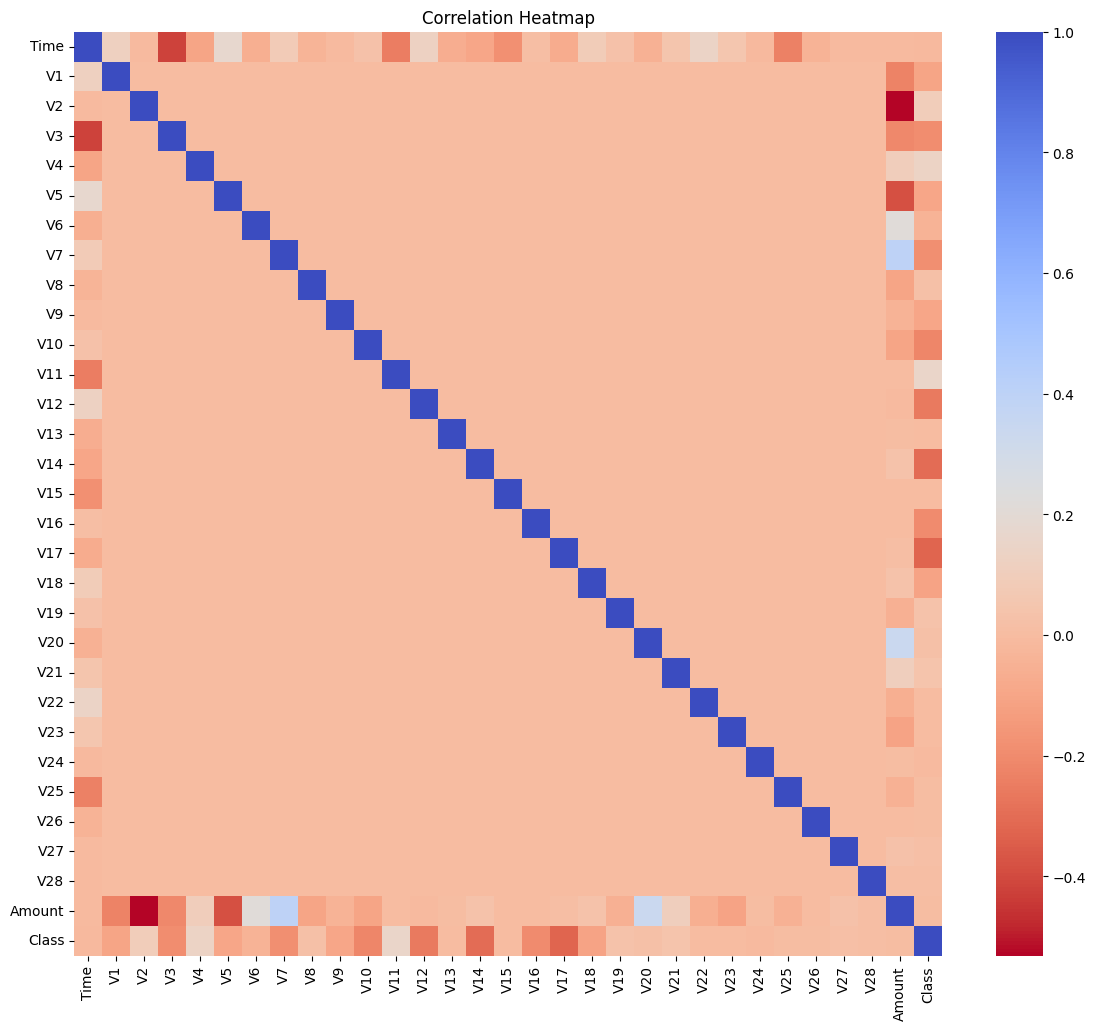

In [12]:
# Correlatrion heatmap
plt.figure(figsize=(14, 12))
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm_r', annot=False)
plt.title("Correlation Heatmap")
plt.savefig("../visuals/Correlation Heatmap.jpg")
plt.show()


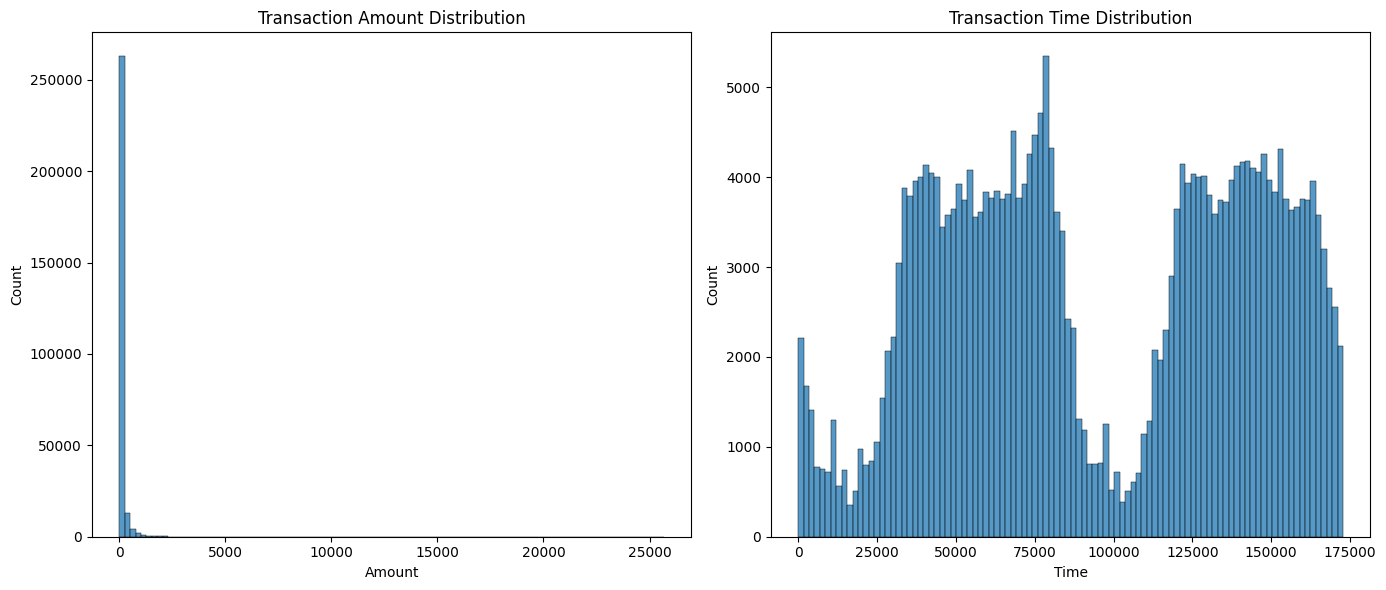

In [13]:
# Transcation amount and time distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['Amount'], bins=100, ax=ax[0])
ax[0].set_title('Transaction Amount Distribution')
plt.savefig("../visuals/Transaction Amount Distribution.jpg")
sns.histplot(df['Time'], bins=100, ax=ax[1])
ax[1].set_title('Transaction Time Distribution')
plt.savefig("../visuals/Transaction Time Distribution.jpg")

plt.tight_layout()
plt.show()

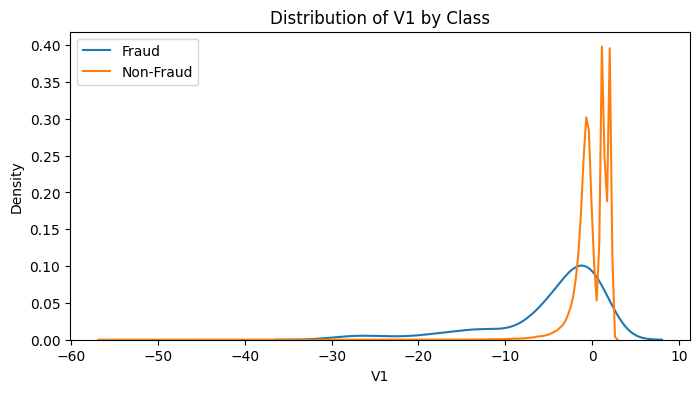

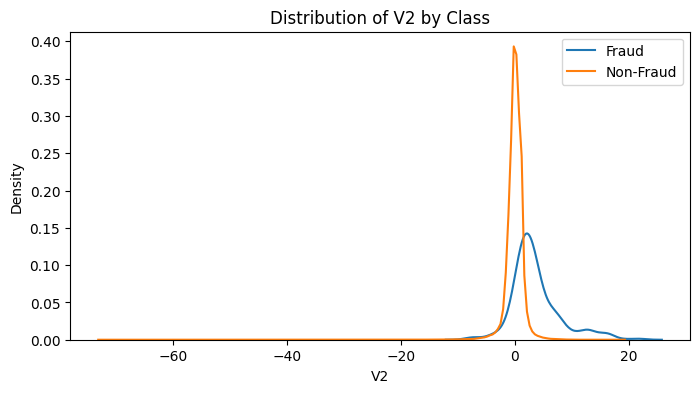

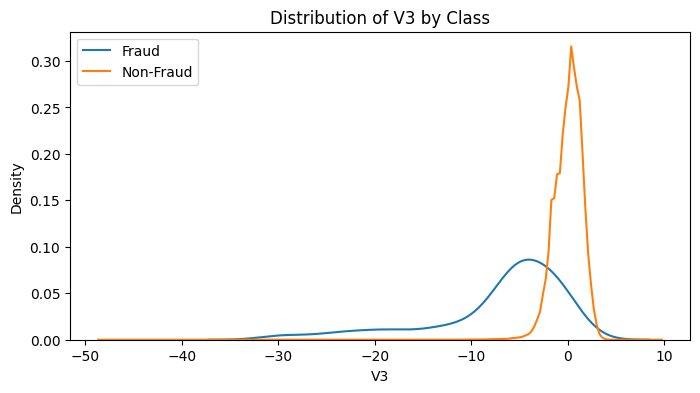

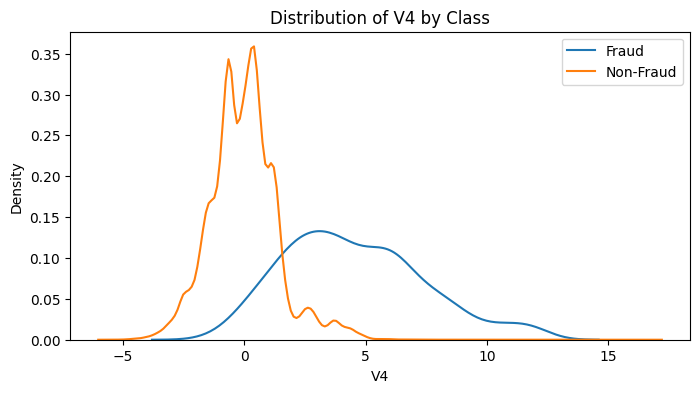

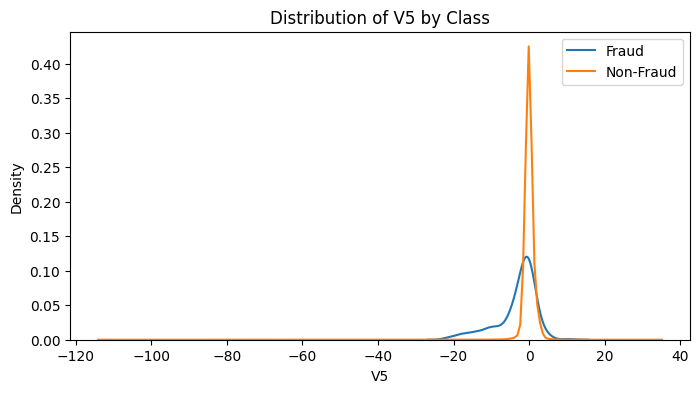

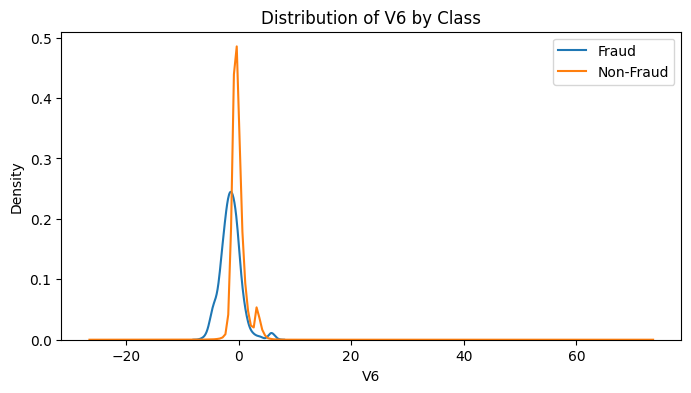

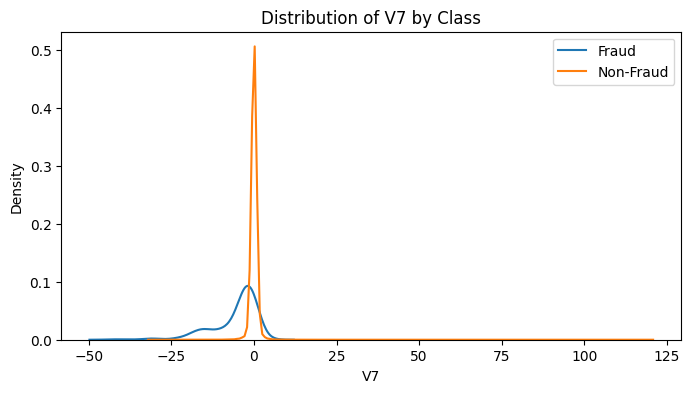

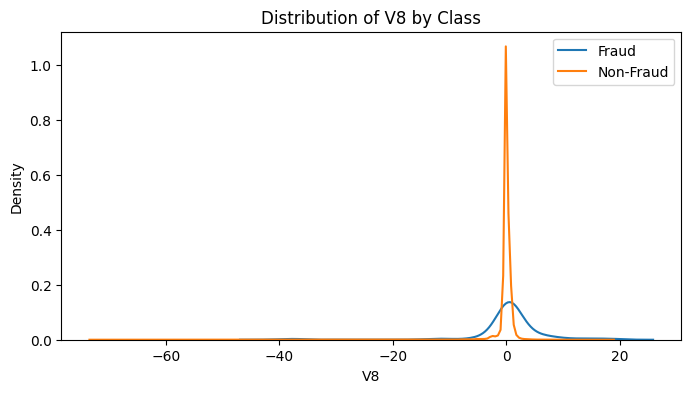

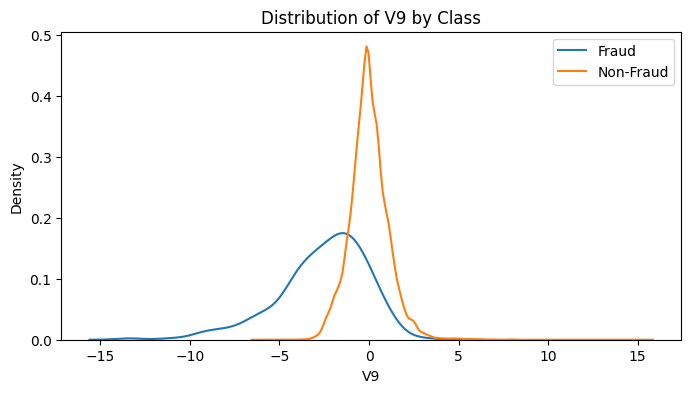

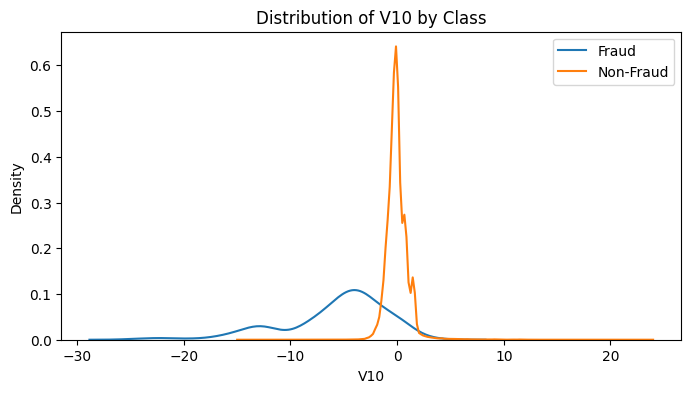

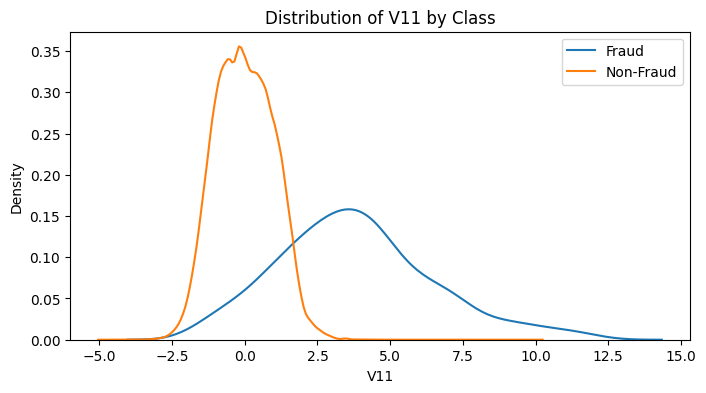

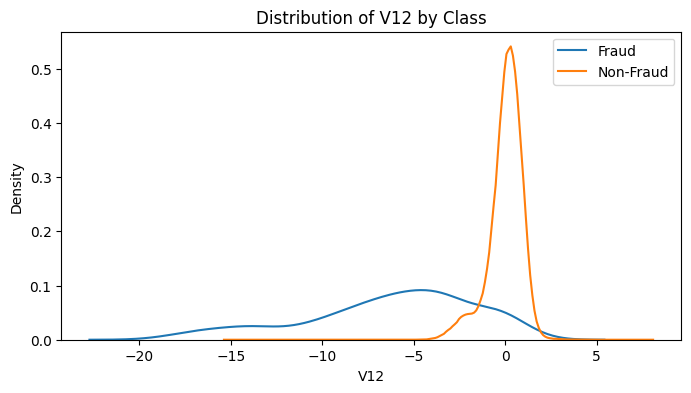

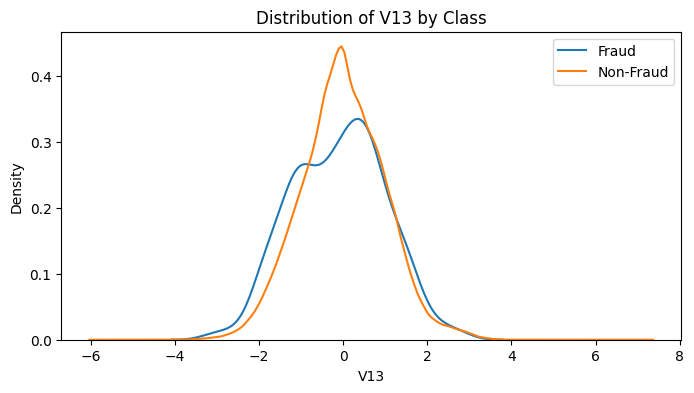

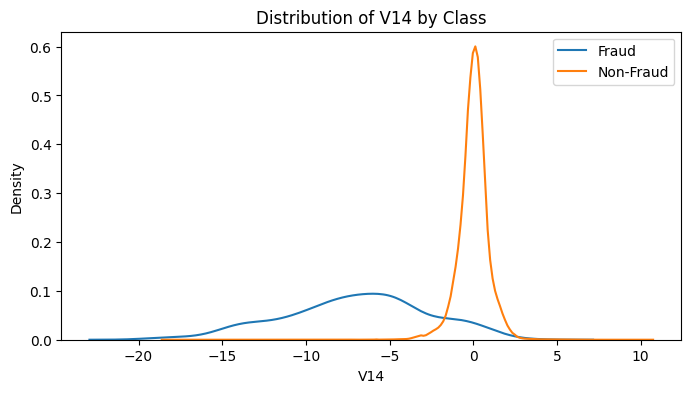

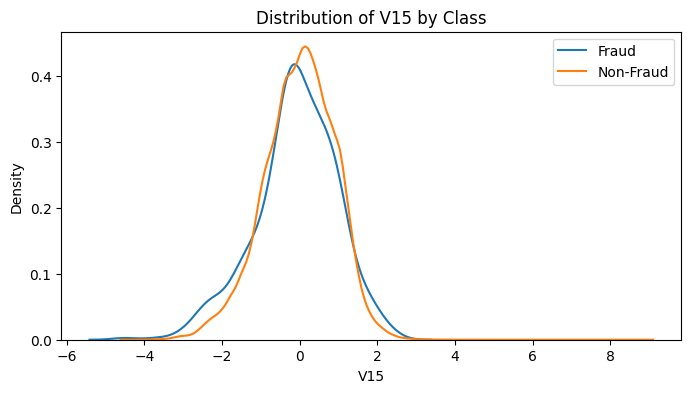

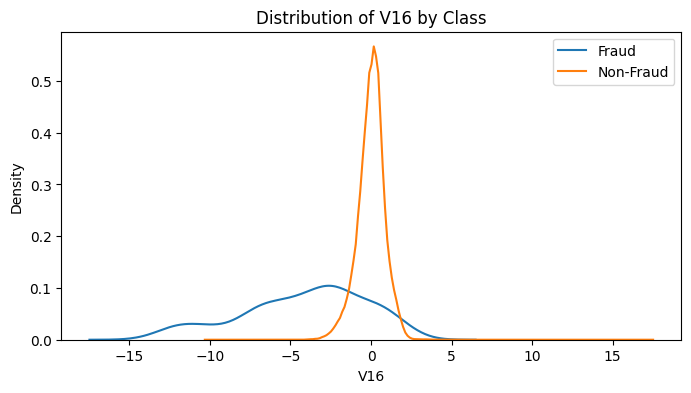

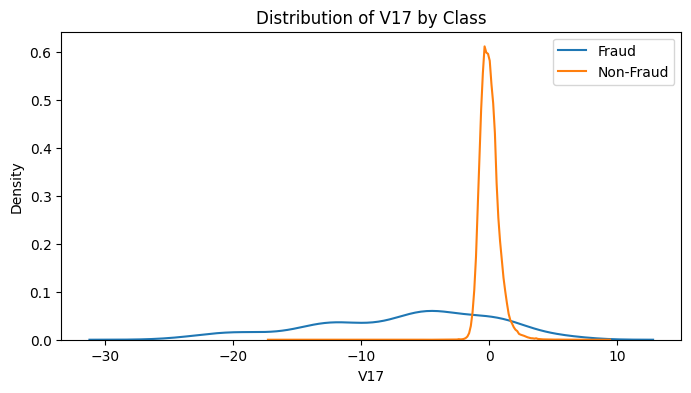

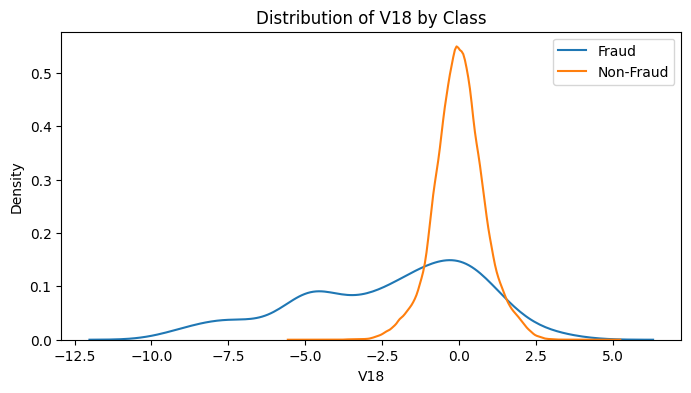

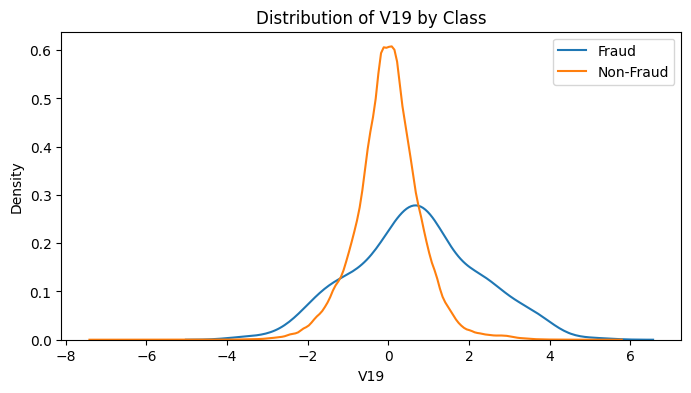

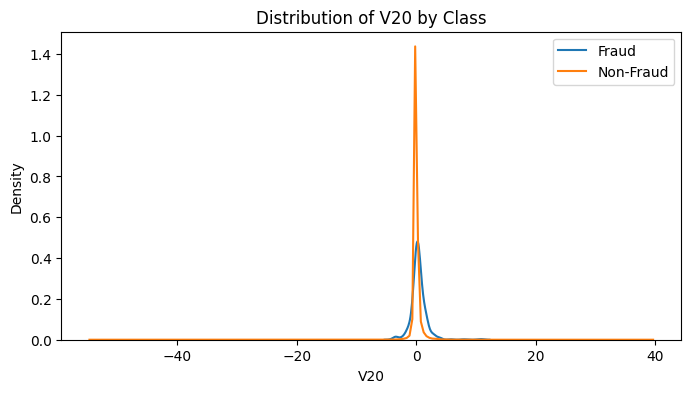

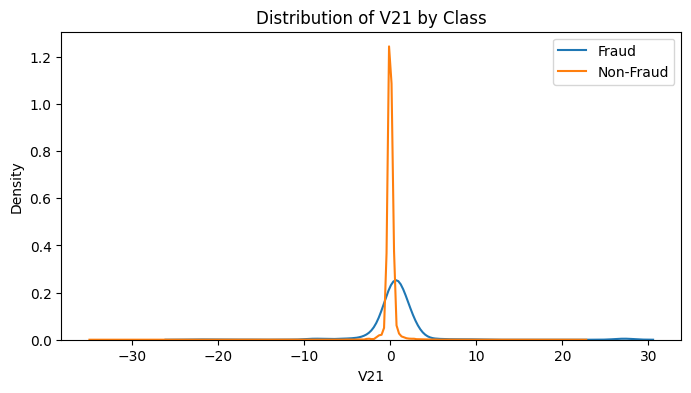

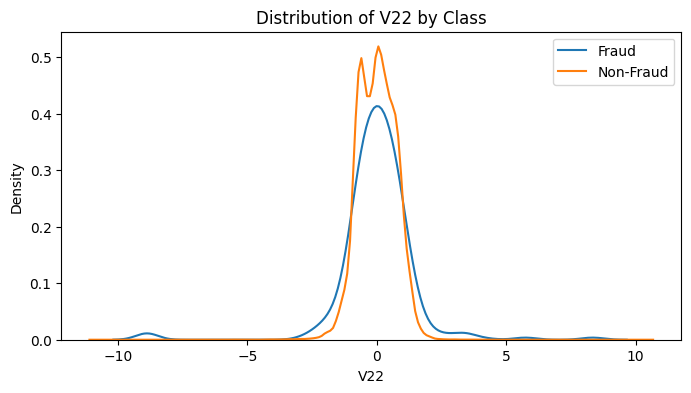

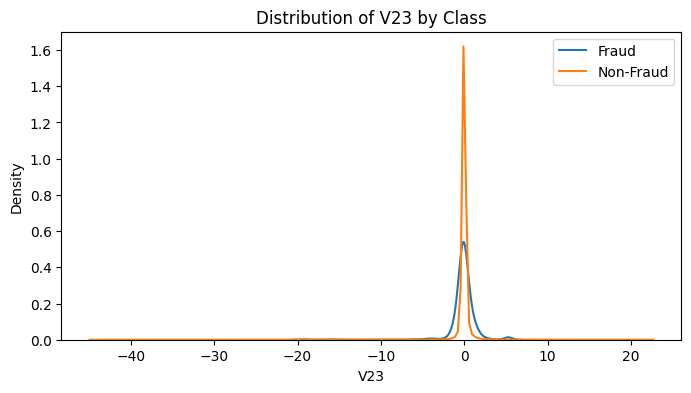

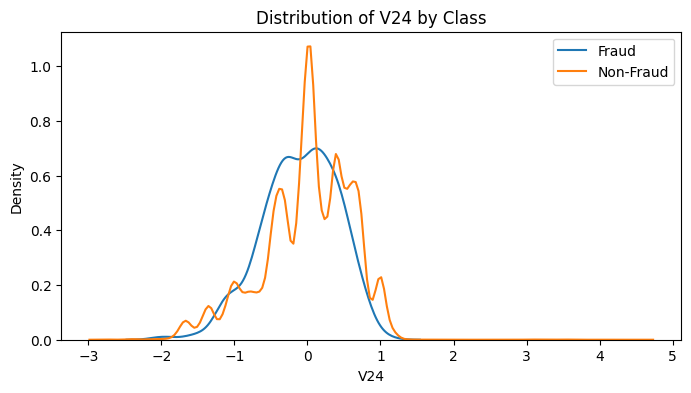

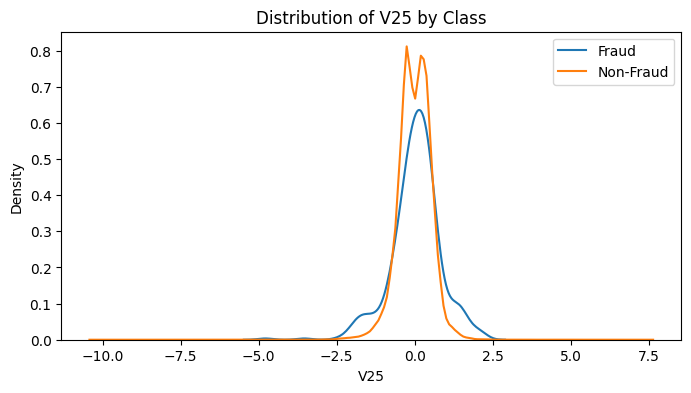

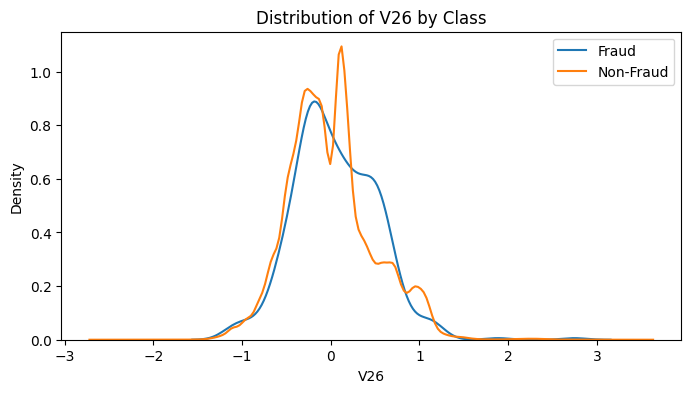

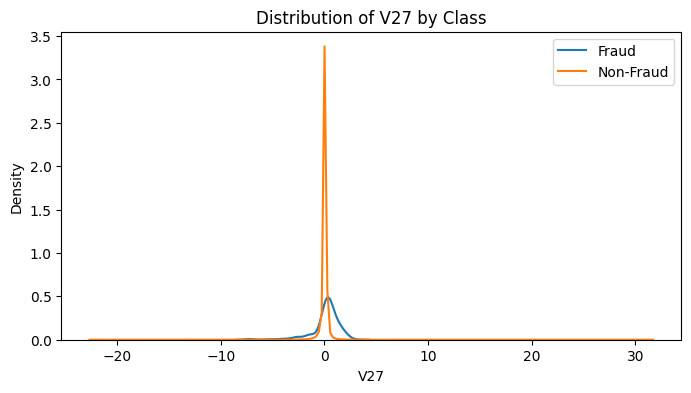

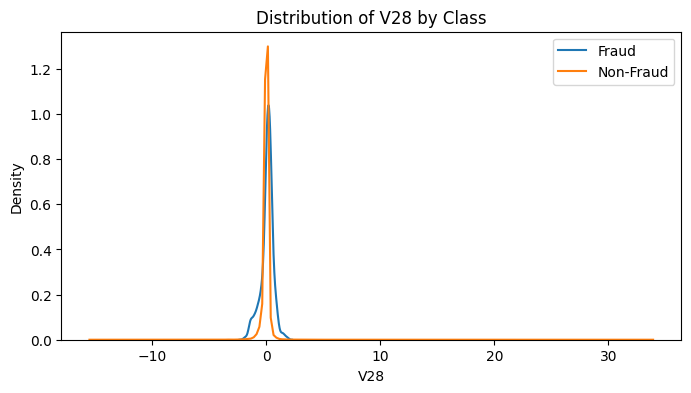

In [14]:
# Distribution by class
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]
pca_features = [f'V{i}' for i in range(1, 29)]
for col in pca_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(fraud[col], label='Fraud')
    sns.kdeplot(non_fraud[col], label='Non-Fraud')
    plt.title(f'Distribution of {col} by Class')
    plt.legend()
    plt.savefig("../visuals/Distribution of {col} by Class.jpg")
    plt.show()

# 2) Data Cleaning: 

This includez standardization, handling the missing values and outliers in the data. 

In [15]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
df = df.dropna()

Series([], dtype: int64)


In [16]:
# Standaredize scaler 
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_scaled'] = scaler.fit_transform(df[['Time']])

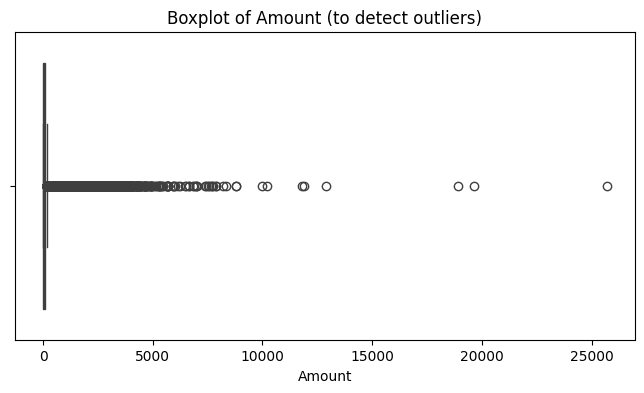

In [17]:
# Boxplot of Amount
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Amount'])
plt.title("Boxplot of Amount (to detect outliers)")
plt.xlabel("Amount")
plt.savefig("../visuals/boxplotofAmount.jpg")
plt.show()

In [18]:
#  Remove or Cap Outliers
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Option 1: Remove outliers
df_no_outliers = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

# Option 2: Cap outliers
df['Amount_capped'] = df['Amount'].clip(lower=lower_bound, upper=upper_bound)

In [19]:
#  Drop Unnecessary Columns
df_cleaned = df.drop(columns=['Amount', 'Time'])

In [20]:
# features
features = [f'V{i}' for i in range(1, 29)] + ['Amount_scaled', 'Time_scaled', 'Class']
df_final = df[features]

# 3) 	Dealing with Imbalanced data :

In [21]:
# under sampling
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)
df_balanced = pd.concat([fraud, non_fraud])

In [22]:
# SMOTE (over sampling)
X = df.drop('Class', axis=1)
y = df['Class']
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 4) Feature Engineering: 

Created new features or transform the existing features for better performance of the ML Models. 

In [23]:
# Separate real and PCA features
real_features = ['Amount', 'Time']  
pca_features = [col for col in X.columns if col not in real_features]

# Standardize PCA features
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X[pca_features])

# Apply PCA on anonymized features
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_pca_scaled)

# Combine PCA components with real features
X_combined = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
for feature in real_features:
    X_combined[feature] = X[feature].values

# 5) Model Selection :

We have Choosed the most appropriate model that can be used for this project. 

In [24]:
# Define models with tweaked LogisticRegression
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, solver='lbfgs'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(max_iter=500, random_state=42)
}

# 6) Model Training

Split the data into train & test sets and use the train set to estimate the best model parameters. 

In [ ]:
# One-hot encode
X_encoded = pd.get_dummies(X, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Run all models
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = y_pred  # fallback for models like SVM without proba

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))
    print(classification_report(y_test, y_pred))

# 7)  Model Validation

Evaluated the performance of the model on data that was not used during the training process. The goal is to estimate the model's ability to generalize to new, unseen data and to identify any issues with the model, such as overfitting. 

In [ ]:
# The Best model logistic regression used to for model validation
model = LogisticRegression(max_iter=5000, solver='lbfgs')
model.fit(X_train, y_train)

# Evaluate on the Hold-Out Test Set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Basic metrics
print("Logistic Regression")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


In [ ]:
#  Precision-Recall Curve (important for imbalanced data)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.savefig("../visuals/Precision-Recall Curve")
plt.show()

 # 8) Hyperparameter Tuning

In [ ]:
# Hyper parameter tuning
clf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5],
}

search = RandomizedSearchCV(
    clf,
    params,
    n_iter=5,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

search.fit(X_train, y_train)

print("Best parameters:", search.best_params_)
print("Best ROC-AUC Score:", search.best_score_)

In [ ]:
#  Check for Overfitting
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))

# 9) Model Deployment

Model deployment is the process of making a trained machine learning model available for use in a production environment. 

In [ ]:
# Save the Trained Model and Scaler
joblib.dump(model, '../models/FindDefault_PredectionodCreditCardFraud.pkl')
joblib.dump(scaler, '../models/FindDefault_PredictionofCreditCardFraud_Scaler.pkl')


# Conclusion :

We have logistic regression model achieved outstanding performance in detecting credit card fraud, with an overall accuracy of 99.92% and a ROC-AUC score of 0.96. 